# Исследование объявлений о продаже

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [79]:
import pandas as pd

In [80]:
%matplotlib inline

In [81]:
import matplotlib.pyplot as plt 

In [82]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [83]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [84]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы выявили что в столбцах:

#total_images          не требуется изменения
#last_price            не требуется изменения
#total_area            не требуется изменения
#rooms                 не требуется изменения
#floor                 не требуется изменения 
#studio                не требуется изменения   
#open_plan             не требуется изменения

#first_day_exposition  переведем в столбец без времени, а только с датой. Так как время не указано.

#ceiling_height        пропуски заменить на 0
#kitchen_area          пропуски заменить на 0
#living_area           пропуски заменить на 0
#airports_nearest      пропуски заменить на 0
#parks_nearest         пропуски заменить на 0
#ponds_nearest         пропуски заменить на 0
#cityCenters_nearest   пропуски заменить на 0

#floors_total          пропуски заменить на 0, поменять на тип int
#balcony               пропуски заменить на 0, поменять на тип int
#parks_around3000      пропуски заменить на 0, поменять на тип int
#parks_around3000      пропуски заменить на 0, поменять на тип int
#days_exposition       пропуски заменить на 0, поменять на тип int

#is_apartment          заменить пропущенные значения на False

#locality_name         причина пропущенных значений пока не понятна, заменять пока не будем

### Предобработка данных

In [85]:
data[['balcony','parks_around3000']] = \
data[['balcony','parks_around3000']].fillna(0).astype('int')

In [86]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце ceiling_height выявлены явные аномалии. 

In [87]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [88]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 4), 'ceiling_height'] = data['ceiling_height'].median()

In [89]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.693220
std          0.204351
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Минимальные значения заполнила медианой, и отбросила параметры меньше 2 метров и больше 4 метров.

Пропуски могли быть из за отсутствия данных или требуемых параметров, к примеру как в столбце is_apartment. Могли быть намеренно сделанные, не внесли информацию. А могла произойти техническая ошибка при действии с данными.

first_day_exposition  переведем в столбец без времени, а только с датой. Так как время не указано.

In [90]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [91]:
data[['rooms']] = data[['rooms']].astype('int')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [93]:
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3.0,196.0,602.0


In [94]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [95]:
data.duplicated().sum()

0

In [96]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Устраним дубликаты 

In [97]:
data['locality_name'].replace({'посёлок':'поселок'}, regex=True, inplace=True)

In [98]:
data['locality_name'].replace({'поселок городского типа':'поселок'}, regex=True, inplace=True)

In [99]:
data['locality_name'].replace({'коттеджный поселок':'поселок'}, regex=True, inplace=True)

In [100]:
data['locality_name'].replace({'садовое товарищество':'поселок'}, regex=True, inplace=True)

In [101]:
data['locality_name'].replace({'городской поселок':'поселок'}, regex=True, inplace=True)

In [102]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосн

In [103]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.693220,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.204351,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [104]:
data.shape[0]

23699

In [105]:
data = data.query('(total_area <= 400) and (rooms <= 10) and (last_price <= 12000000)')
data = data[data['floor'] <= 25] 

In [106]:
data.shape[0]

21718

In [107]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21718.000000,2.171800e+04,21718.000000,21718.000000,21718.000000,21642.000000,20024.000000,21718.000000,19632.000000,21718.000000,16226.000000,16238.000000,21718.000000,6800.000000,16239.000000,7838.000000,19064.000000
mean,9.686297,4.878702e+06,53.521919,1.937011,2.672472,10.722946,30.719027,5.847454,9.644731,0.588912,28876.970603,14924.984789,0.419974,489.076471,0.713344,531.303776,173.592478
std,5.547501,2.273471e+06,19.417094,0.917107,0.175522,6.599226,13.698405,4.828903,3.875520,0.939722,12958.688569,8569.845288,0.706974,330.128264,0.893608,276.999454,212.066438
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,16.000000,1.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.100000,2.000000,7.000000,0.000000,18090.000000,10563.500000,0.000000,289.000000,0.000000,315.000000,44.000000
50%,9.000000,4.406770e+06,49.600000,2.000000,2.650000,9.000000,29.200000,4.000000,9.000000,0.000000,26944.000000,13587.000000,0.000000,456.000000,0.000000,520.000000,92.000000
75%,14.000000,6.000000e+06,64.000000,3.000000,2.700000,16.000000,39.500000,8.000000,11.000000,1.000000,37537.750000,16685.000000,1.000000,613.000000,1.000000,741.000000,220.000000
max,50.000000,1.200000e+07,230.000000,7.000000,4.000000,60.000000,160.000000,25.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Я проверила таблицу обнаружила аномальные отклонения. Изменила типы данных. Нашла дубликаты в столбце locality_name и заменила их. В столбце ceiling_height обнаружилось аномальное отклонение, минимальные значения заполнила медианой, и отбросила параметры меньше 2 метров и больше 4 метров. В столбцах total_area, rooms и last_price нашли отклонения и убрали их.

### Посчитайте и добавьте в таблицу новые столбцы

Саздаем новый столбец price_meter, что бы узнать стоимость квадратного метра

In [108]:
data['price_meter'] = data['last_price'] / data['total_area']

Добавим столбец day_of_publication - днь недели

In [109]:
data['day_of_publication']=data['first_day_exposition'].dt.dayofweek

Добавим столбец month_of_publication - месяц публикации объявленя

In [110]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

Добавим столбец year_of_publication - год публикации объявленя

In [111]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

Добавим столбец type_floor - тип этажа квартиры

In [112]:
def type_floor (row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [113]:
data['type_floor'] = data.apply(type_floor, axis = 1)

Добавим столбец km_to_сenter - расстояния до центра в километрах 

In [114]:
data['km_to_сenter'] = round(data['cityCenters_nearest'] / 1000)

In [115]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,day_of_publication,month_of_publication,year_of_publication,km_to_сenter
count,21718.000000,2.171800e+04,21718.000000,21718.000000,21718.000000,21642.000000,20024.000000,21718.000000,19632.000000,21718.000000,...,21718.000000,6800.000000,16239.000000,7838.000000,19064.000000,21718.000000,21718.000000,21718.000000,21718.000000,16238.000000
mean,9.686297,4.878702e+06,53.521919,1.937011,2.672472,10.722946,30.719027,5.847454,9.644731,0.588912,...,0.419974,489.076471,0.713344,531.303776,173.592478,92081.648469,2.574040,6.398379,2017.383921,14.920926
std,5.547501,2.273471e+06,19.417094,0.917107,0.175522,6.599226,13.698405,4.828903,3.875520,0.939722,...,0.706974,330.128264,0.893608,276.999454,212.066438,29730.183625,1.793867,3.489274,1.021725,8.574906
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,16.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.600000,5.000000,18.100000,2.000000,7.000000,0.000000,...,0.000000,289.000000,0.000000,315.000000,44.000000,74561.403509,1.000000,3.000000,2017.000000,11.000000
50%,9.000000,4.406770e+06,49.600000,2.000000,2.650000,9.000000,29.200000,4.000000,9.000000,0.000000,...,0.000000,456.000000,0.000000,520.000000,92.000000,92619.047619,3.000000,6.000000,2017.000000,14.000000
75%,14.000000,6.000000e+06,64.000000,3.000000,2.700000,16.000000,39.500000,8.000000,11.000000,1.000000,...,1.000000,613.000000,1.000000,741.000000,220.000000,109420.248869,4.000000,10.000000,2018.000000,17.000000
max,50.000000,1.200000e+07,230.000000,7.000000,4.000000,60.000000,160.000000,25.000000,64.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,6.000000,12.000000,2019.000000,66.000000


### Проведите исследовательский анализ данных

Построим гистограмму обшей площади квартир

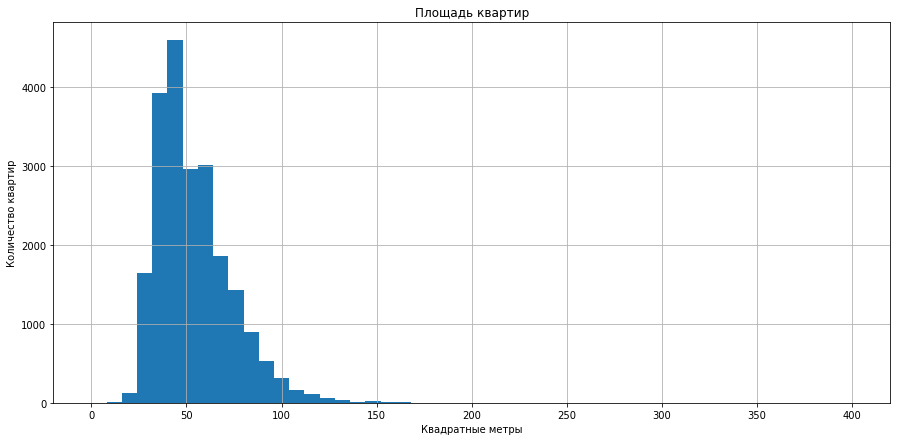

In [116]:
data.hist('total_area', grid = True, bins = 50, range = (0, 400), figsize = (15, 7))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно, что квартир больше всего с площадью от 40м2 до 70м2. Есть выбросы, но они в минимальном количестве. 

Построим гистограмму жилой площади квартир

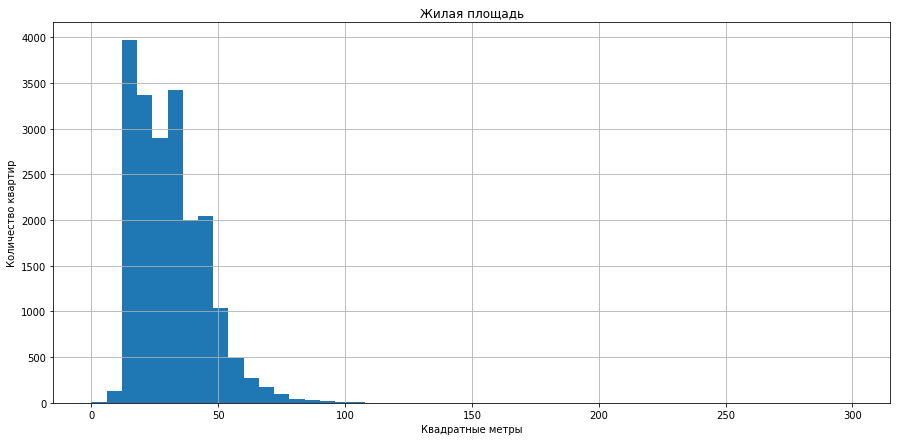

In [117]:
data.hist('living_area', grid = True, bins = 50, range = (0, 300), figsize = (15, 7))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно, есть выбросы, но они не критичны. Больше всего кваир с площадью ~ 25 до 50 м2

Построим гистограмму площад кухни

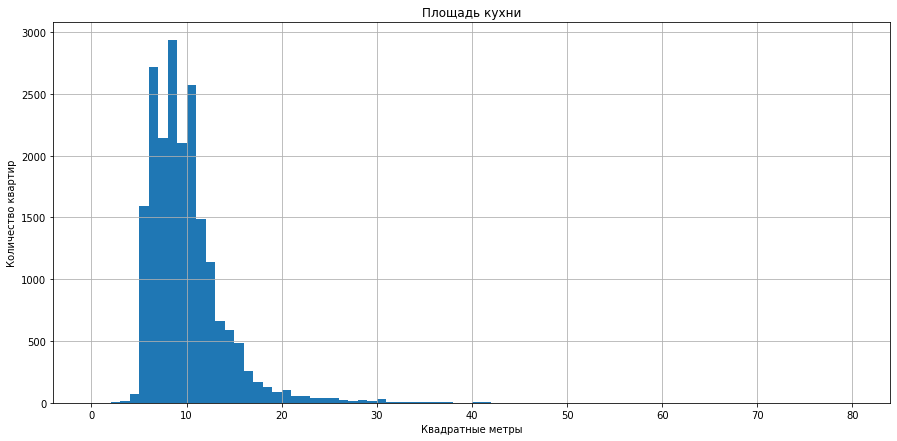

In [118]:
data.hist('kitchen_area', grid = True, bins = 80, range = (0, 80), figsize = (15, 7))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме видно, есть выбросы, но они не критичны. Больше всего квартир с площадью кухни от ~ 5 до 12 м2

Построим гистограмму стоимости квартир

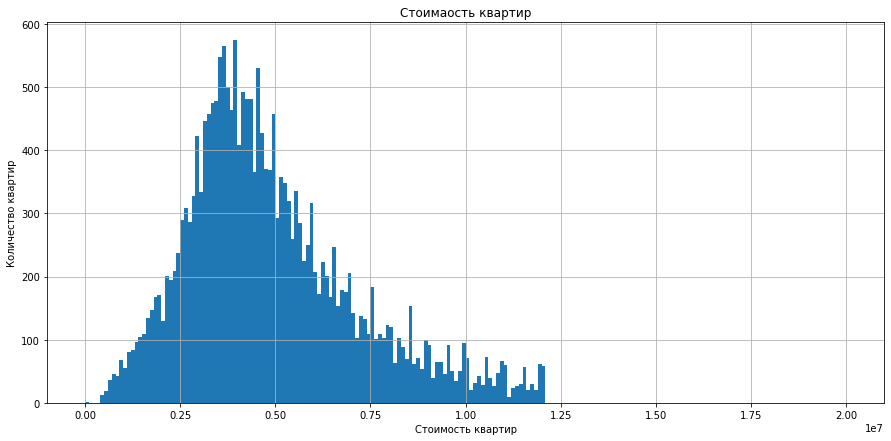

In [119]:
data.hist('last_price', grid = True, bins = 200, range = (0,20000000), figsize=(15, 7))
plt.title('Стоимаость квартир')
plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир')
plt.show()



Судя по гистграмме данные в норме, нет критических выбросов

Построим гистограмму по комнатам

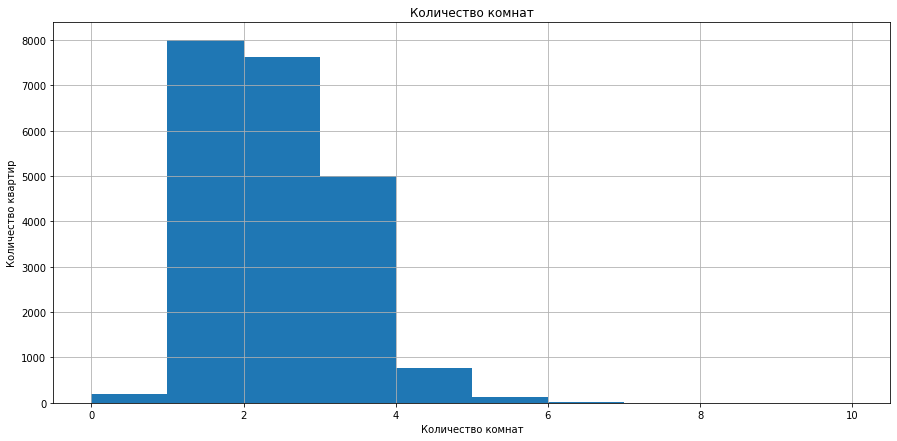

In [120]:
data.hist('rooms', grid = True, bins = 10, range = (0,10), figsize = (15, 7))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

По данной гистограмме данные в норме

Построим гистограмму высота потолков

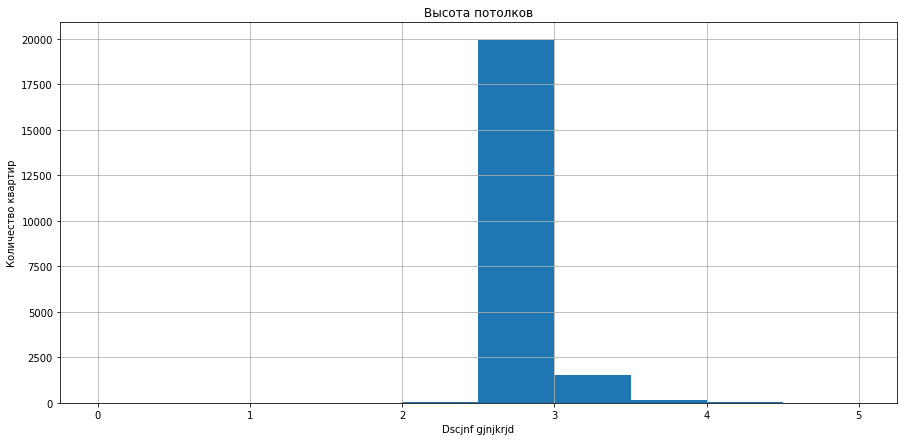

In [121]:
data.hist('ceiling_height', grid = True, bins = 10, range = (0, 5), figsize = (15, 7))
plt.title('Высота потолков')
plt.xlabel('Dscjnf gjnjkrjd')
plt.ylabel('Количество квартир')
plt.show()

По данной гистограмме так же показатели в норме

Построим гистограмму этаж квартиры

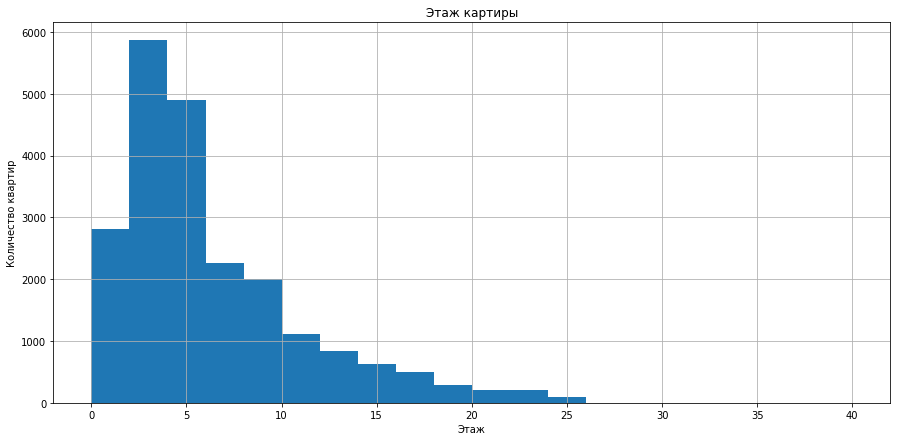

In [122]:
data.hist('floor', grid = True, bins = 20, range = (0, 40), figsize = (15, 7))
plt.title('Этаж картиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

По данной гистограмме так же показатели в норме

Построим гистограмму с типом этажа

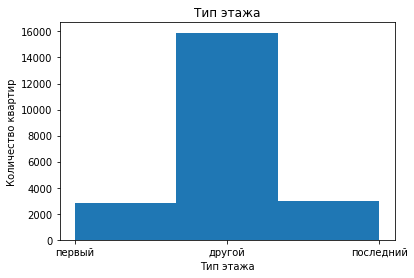

In [123]:
plt.hist(data['type_floor'], bins = 3)
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Самый популярный тип этажа "другой"

Построим гистограмму количество этажей в доме

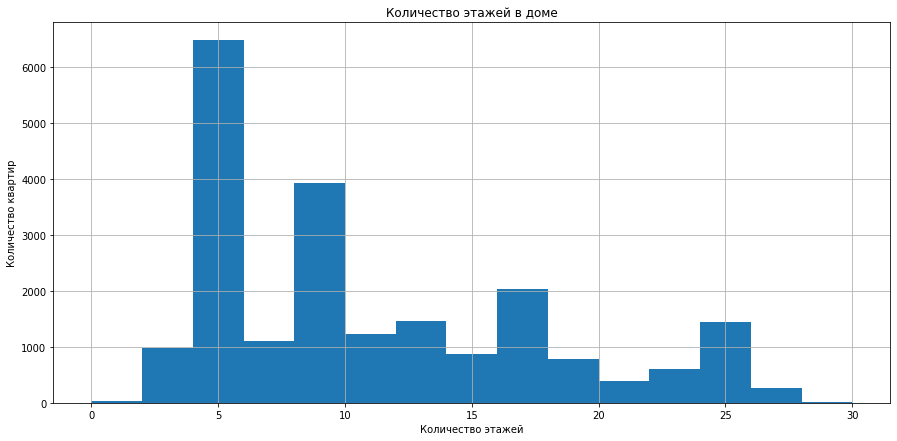

In [124]:
data.hist('floors_total', grid = True, bins = 15, range = (0, 30), figsize = (15, 7))
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Больше всего домов с 5-ю этажами.

Построим гистограмму расстояни до центра города

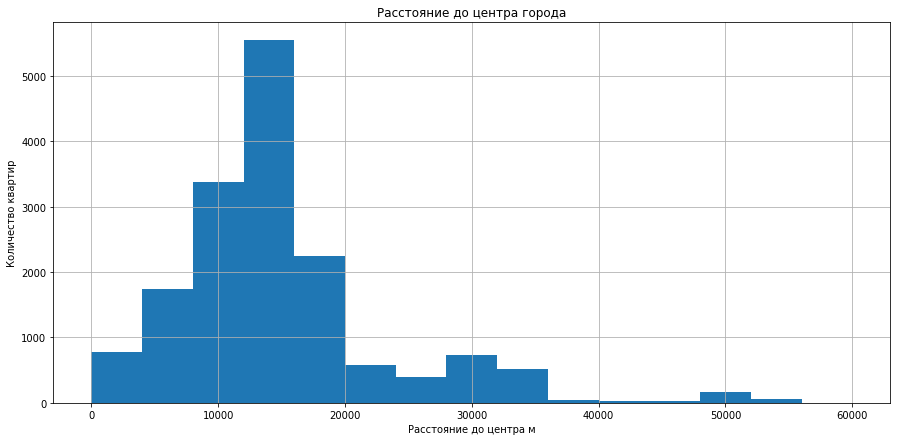

In [125]:
data.hist('cityCenters_nearest', grid = True, bins = 15, range = (0, 60000), figsize = (15, 7))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра м')
plt.ylabel('Количество квартир')
plt.show()

По данной гистограмме можно опредилить, большее число квартир стоит на продаже на ростоянии от ~ 11000 до 15000 метров 

Построим гистограмму расстояние до ближайшего аэропорта 

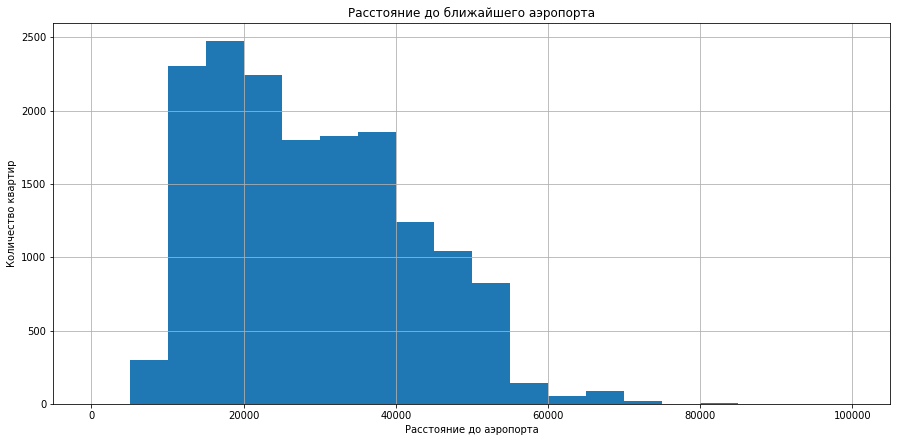

In [126]:
data.hist('airports_nearest', grid = True, bins = 20, range = (0, 100000), figsize = (15, 7))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме выдны выбросы, так как пустые значения заменили на 0. В остальном все ок.

Построим гистограмму ближайшего расстояния до парка

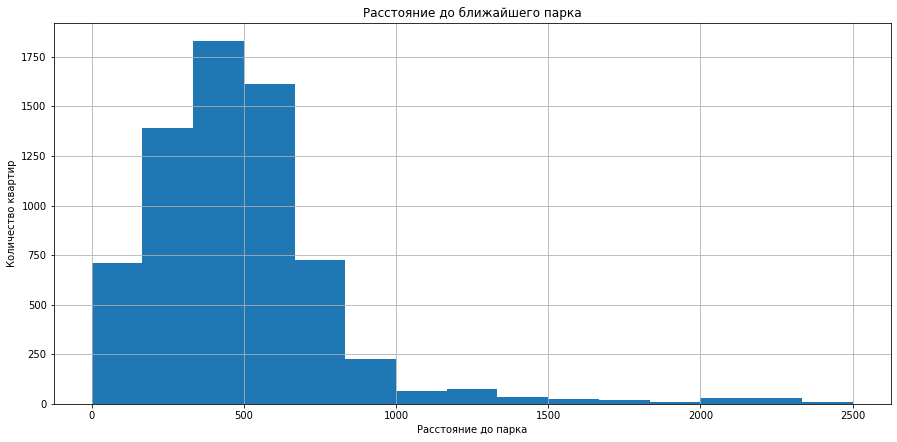

In [127]:
data.hist('parks_nearest', grid = True, bins = 15, range = (0, 2500), figsize = (15, 7))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество квартир')
plt.show()

На гистограмме выдны выбросы, так как пустые значения заменили на 0. В остальном все ок.

Построим гистограмму день и месяц публикации

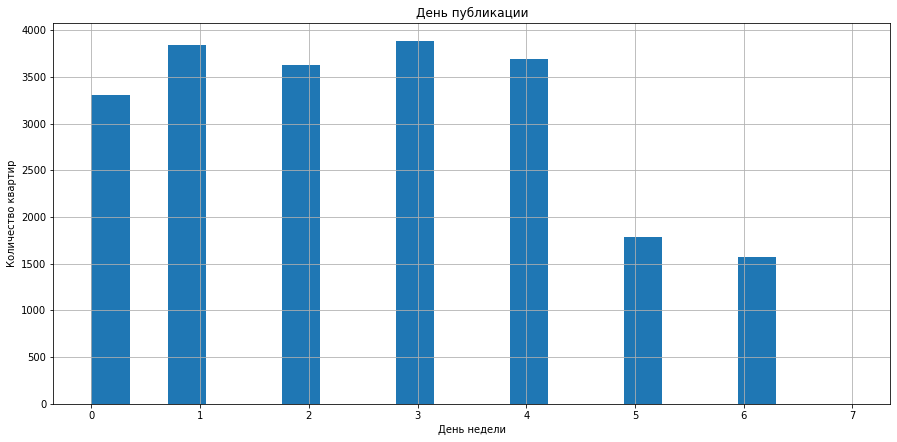

In [128]:
data.hist('day_of_publication', grid = True, bins = 20, range = (0, 7), figsize = (15, 7))

plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()


По гистаграме видно в четверг самый высокий день публикации,  а воскресенье самый низкий  

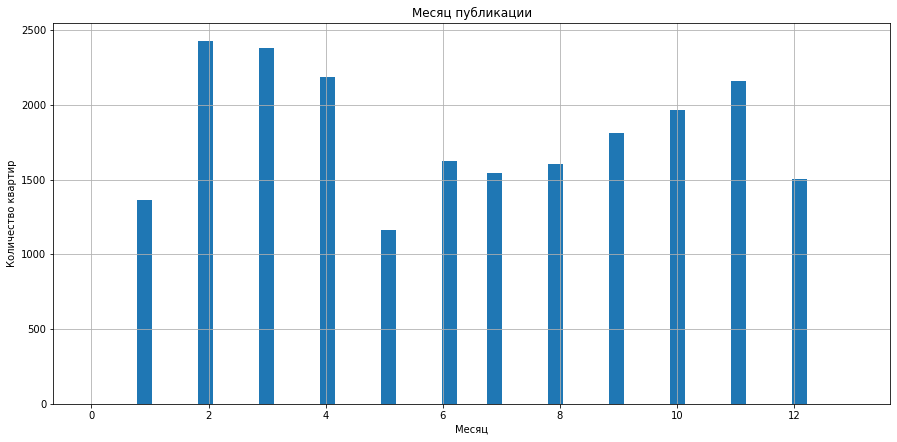

In [129]:

data.hist('month_of_publication', grid = True, bins = 50, range = (0, 13), figsize = (15, 7))

plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()


Самый высокий месяц публикаций в феврале, а в мае самые низкие  

Посмотрим как быстро продовались квартиры

In [130]:
data['days_exposition'].describe()

count    19064.000000
mean       173.592478
std        212.066438
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-100.0, 600.0)

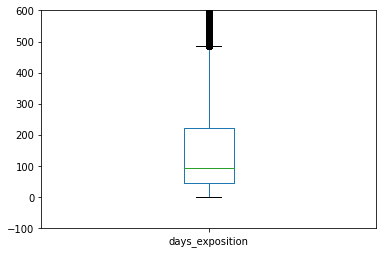

In [131]:
data['days_exposition'].plot.box()
plt.ylim(-100, 600)

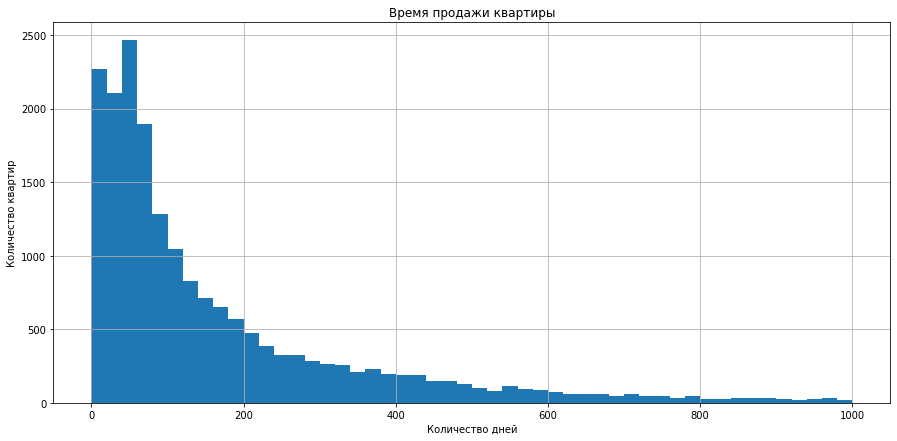

In [132]:
data.hist('days_exposition', grid = True, bins = 50, range = (0, 1000), figsize = (15, 7))

plt.title('Время продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

По данным выявлено отклонение на показателе 0. Так как мы пустые значения заменили на 0.

Теперь отбросим 0 и посмотрим что получится

(1.0, 1000.0)

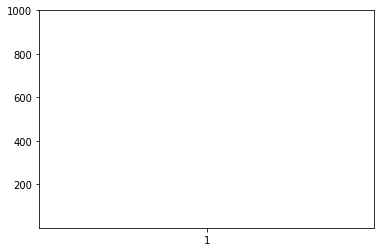

In [133]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

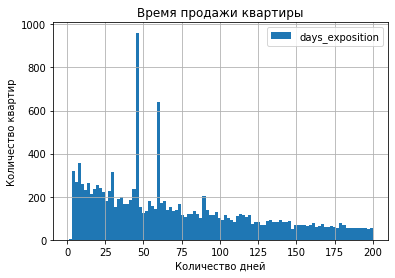

In [134]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))
plt.title('Время продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [135]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count    19064.000000
mean       173.592478
std        212.066438
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

По данным видно что в среднем квартиры продаются за 180 дней, если смотреть по медиане то больше всего продаж происходит за 95 дней. Самыми быстрые продажы можно считать от 45 и меньше дней. А самые долгие это от 232 дня и дольше.

Проверим какие факторы влияют на стоимость объекта

Посмотрим как площадь объекта влияет на стоимоть

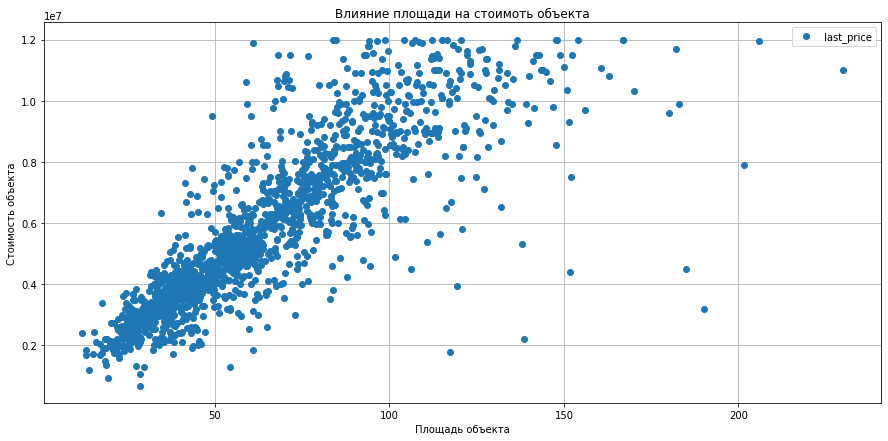

In [136]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(15, 7))
plt.title('Влияние площади на стоимоть объекта')
plt.xlabel('Площадь объекта')
plt.ylabel('Стоимость объекта')
plt.show()

In [137]:
data['total_area'].corr(data['price_meter'])

-0.08607193277692723

Из полученных данных можем видеть чем больше площать тем соимость немного выше. Получется что завизимость очень низкая, так как корреляция 0.3

Посмотрим влияние жилой пложади на стоимоть

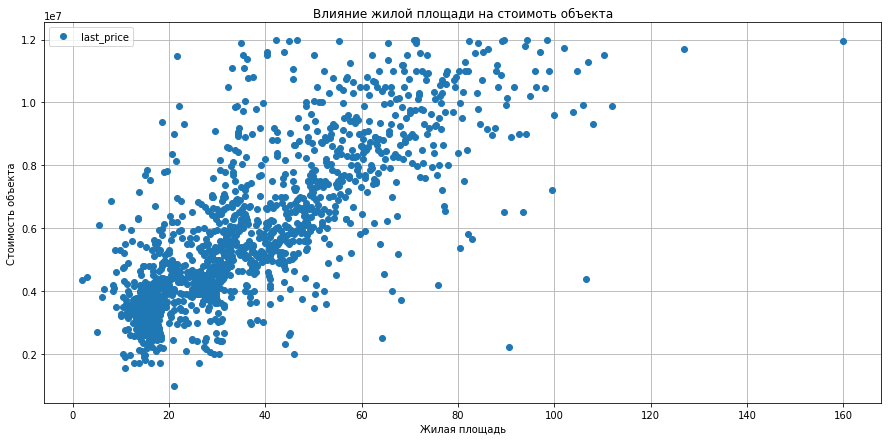

In [138]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(15, 7))
plt.title('Влияние жилой площади на стоимоть объекта')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость объекта')
plt.show()

In [139]:
data['living_area'].corr(data['price_meter'])

-0.1679439983682269

Здесь еще меньше зависимость между двух показателе.  

Теперь постмотри как влияет площадь кухни на стоимоть

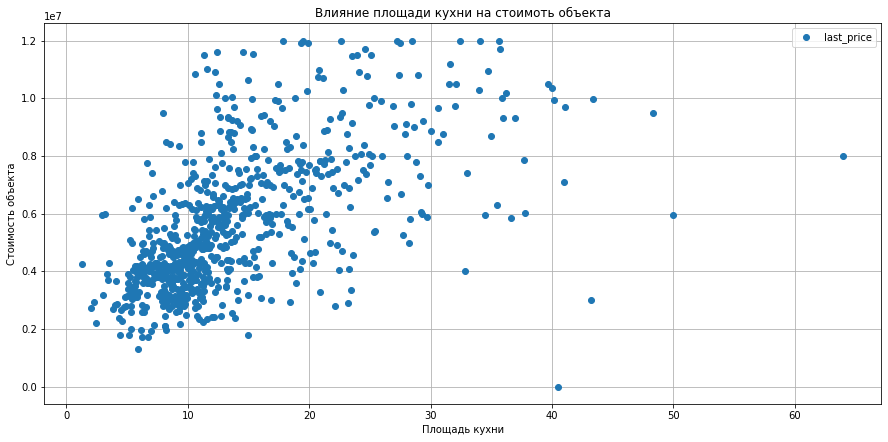

In [140]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(15, 7))
plt.title('Влияние площади кухни на стоимоть объекта')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость объекта')
plt.show()

In [141]:
data['kitchen_area'].corr(data['price_meter'])

0.2197390244493475

Влияние такое же низкое.

Проверим влияние количества комнат на стоимость объекта

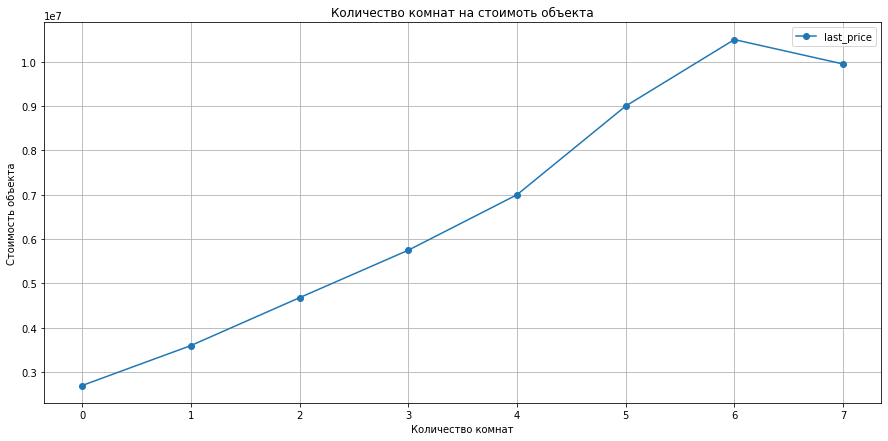

In [142]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7))
plt.title('Количество комнат на стоимоть объекта')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость объекта')
plt.show()

In [143]:
data['rooms'].corr(data['price_meter'])

-0.22962085471345234

Влияние такое же низкое.

Посмотрим влияние этажа на стоимость объекта

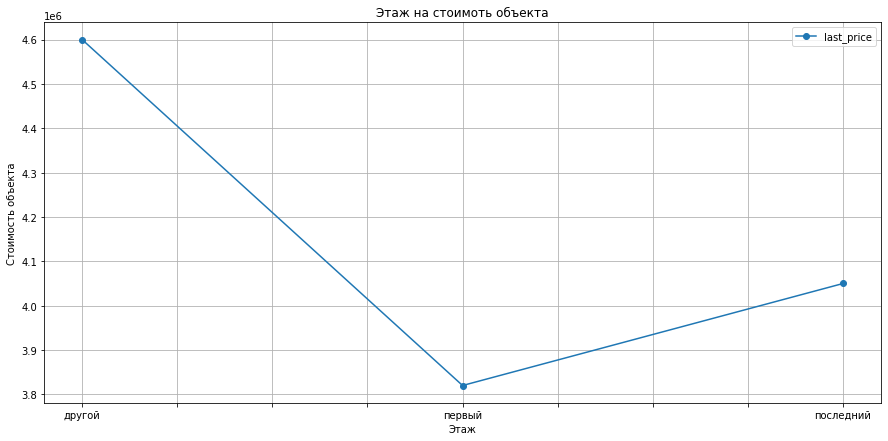

In [144]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7))
plt.title('Этаж на стоимоть объекта')
plt.xlabel('Этаж')
plt.ylabel('Стоимость объекта')
plt.show()

Но графике видно что самая дешевая квартира на первом этаже, а самые дорогие между первым и последнем этажом.

Посмотрим как влияет день недели на стоимость квартиры

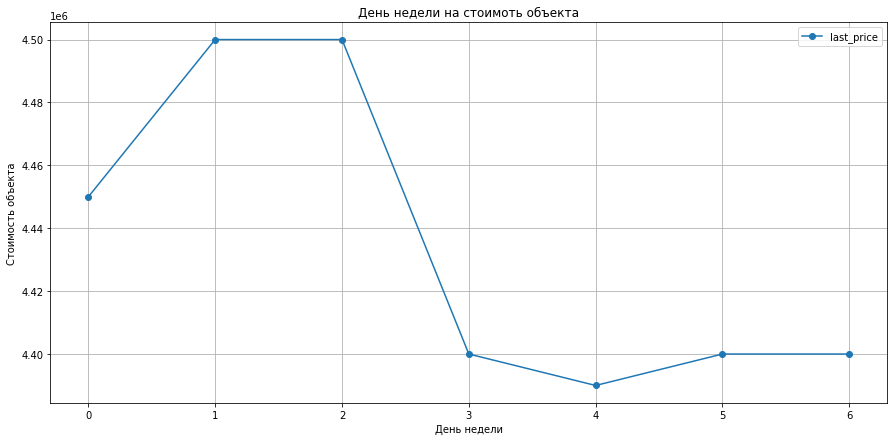

In [145]:
data.pivot_table(index='day_of_publication', values='last_price', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7))
plt.title('День недели на стоимоть объекта')
plt.xlabel('День недели')
plt.ylabel('Стоимость объекта')
plt.show()

По графику видно что самая высокая цена за квартиру выставленная во вторник к выходным стоимость уменьшается.

Посмотрим как влияет месяц на стоимость квартиры

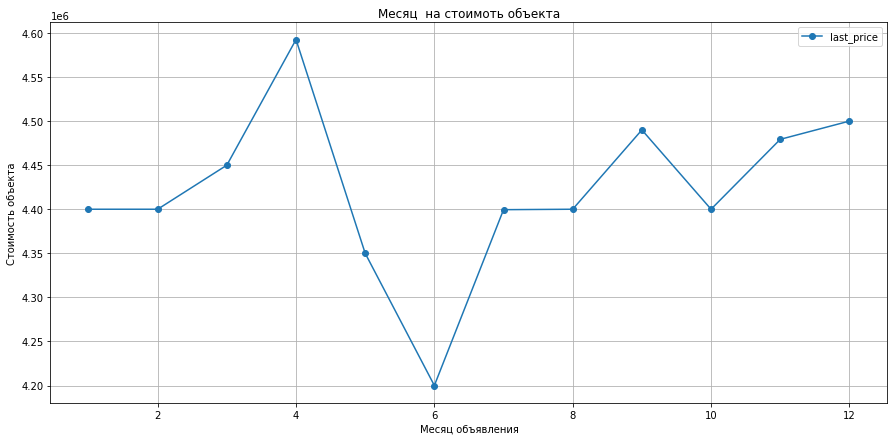

In [146]:
data.pivot_table(index='month_of_publication', values='last_price', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7))
plt.title('Месяц  на стоимоть объекта')
plt.xlabel('Месяц объявления')
plt.ylabel('Стоимость объекта')
plt.show()

По графику можно увидеть что в апреле выставляют самые дорогие квартиры,после идет спад в мае, а в июне самые дешевые.

Посмотрим как влияет год на стоимость квартиры

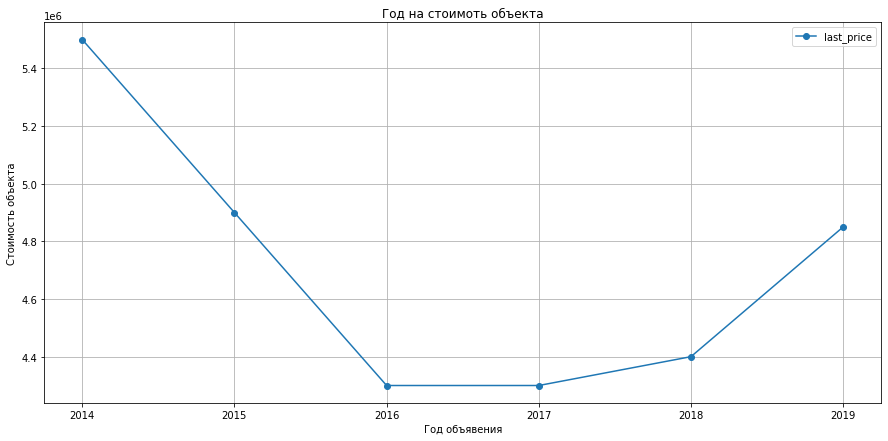

In [147]:
data.pivot_table(index='year_of_publication', values='last_price', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7))
plt.title('Год на стоимоть объекта')
plt.xlabel('Год объявения')
plt.ylabel('Стоимость объекта')
plt.show()

Самые высокие цены были в 2014 году, после начался спад в 2015. Самые низкие цены были в 2017, потом начался небольшой рост

Выявим среднюю стоимость квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. Найдем пункты с самой высокой и самой низкой стоимотью за м2

In [148]:
ten_cities = data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc=['count', 'mean'])
ten_cities.columns = ['count', 'mean']
ten_cities_price = ten_cities.sort_values('count', ascending = False).head(10)
display(ten_cities_price.mean())
ten_cities_price.sort_values('mean',  ascending = False)


count     1704.600000
mean     82151.444507
dtype: float64

,count,mean
locality_name,,
Санкт-Петербург,13837,105614.902811
Пушкин,339,100322.823868
деревня Кудрово,298,92409.726322
поселок Парголово,313,89966.650892
поселок Мурино,545,85768.464718
поселок Шушары,440,78677.364217
Колпино,336,75185.478229
Гатчина,305,68421.902770
Всеволожск,397,67214.252635


Отобрав 10 населенных пунктов с наибольшим количеством объявлений, выявили. Наибольшая стоимость квадратного метра в Санкт-Петербурге, а самая маленькая в Выборге. 

Посмотрим как влияет расстояния до ценра города Санкт-Петербурга на стоимость

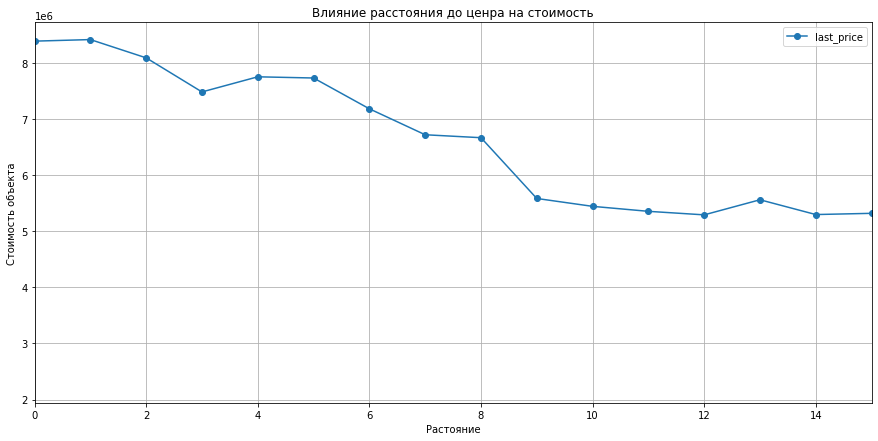

In [149]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_сenter', values='last_price') \
.plot(grid=True, style='o-', xlim=(0,15), figsize=(15, 7))
plt.title('Влияние расстояния до ценра на стоимость')
plt.xlabel('Растояние')
plt.ylabel('Стоимость объекта')
plt.show()


На графике видно, чем ближе к центру тем дороже, начиная от 9 км и дальше стоимость силно не отличается. 

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

Данные мы обработали:
    - обработали пропущенные значения;
    - заменили типы данных;
    - добавили добалили нужные столбци;
    - обработали анамилии;
    - устранили дубликаты.
    
Проведя анализ данных мы выявили:
    
    - Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 232 дней - это долго.
    
    - Факторы, влияющие на стоимость

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

    - Стоимость квадратного метра в 10 населённых пунктов с наибольшим числом объявлений

Дороже всего квадратный метр в Санкт-Петербурге - 112007
Дешевле всего квадратный метр в Выборге - 57055
    - Факторы, влияющие на стоимость в центре Санкт-Петербурга

Чем ближе к центру тем дороже, начиная с 9 км и дальше стоимость силно не отличается. 